DIABETICS PREDICTION MODEL

The objective of this project is to develop a machine learning model that predicts a person's 
diabetes status (healthy, pre-diabetic, or diabetic) based on their demographics, lab test 
results, and lifestyle survey responses. 

The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey 
information to classify individuals as diabetic, pre-diabetic, or healthy. It includes 253,680 
instances and 21 features covering demographics, medical history, lifestyle habits, and 
healthcare access. 

 Dataset link : https://drive.google.com/drive/folders/1QBuiVLEiZnrKraBctHZ7KuC2LJol67Zb?usp=sharing

FEATURES 

1. HighBP – Indicates if the person has high blood pressure 
2. HighChol – Indicates if the person has high cholesterol 
3. CholCheck – Whether cholesterol was checked in the past 5 years 
4. BMI – Body Mass Index (numerical value) 
5. Smoker – Whether the person is a smoker 
6. Stroke – History of stroke (Yes/No) 
7. HeartDiseaseorAttack – History of heart disease or heart attack 
8. PhysActivity – Whether the person engages in physical activity 
9. Fruits – Whether the person consumes fruits regularly 
10. Veggies – Whether the person consumes vegetables regularly 
11. HvyAlcoholConsump – Heavy alcohol consumption status 
12. AnyHealthcare – Whether the person has access to healthcare services 
13. NoDocbcCost – Whether the person couldn't see a doctor due to cost 
14. GenHlth – Self-reported general health status (categorical) 
15. MentHlth – Number of mentally unhealthy days in the past 30 days 
16. PhysHlth – Number of physically unhealthy days in the past 30 days 
17. DiffWalk – Whether the person has difficulty walking due to health reasons 
18. Sex – Gender of the individual 
19. Age – Age group (bucketed) 
20. Education – Education level of the individual 
21. Income – Income level of the individual 
22. Diabetes_binary – Target variable: 0 (No diabetes) or 1 (Diabetes) 

To do :
1. Checked data types, duplicates, and basic statistics.
2. Visualized feature distributions (univariate analysis).
3. Compared features with target variable (bivariate analysis).
4. Plotted a correlation heatmap.

The first step in any data science project is to load the dataset and inspect it. 

In [2]:
import pandas as pd

# Loading dataset
df = pd.read_csv('cdc_diabetes_health_indicators.csv')  
print(df.head())
print(df.info())
print(df.describe())


   HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   40       1       0                     0   
1       0         0          0   25       1       0                     0   
2       1         1          1   28       0       0                     0   
3       1         0          1   27       0       0                     0   
4       1         1          1   24       0       0                     0   

   PhysActivity  Fruits  Veggies  ...  NoDocbcCost  GenHlth  MentHlth  \
0             0       0        1  ...            0        5        18   
1             1       0        0  ...            1        3         0   
2             0       1        0  ...            1        5        30   
3             1       1        1  ...            0        2         0   
4             1       1        1  ...            0        2         3   

   PhysHlth  DiffWalk  Sex  Age  Education  Income  Diabetes_binary  
0        15         1    0  

Check for Duplicates
Sometimes datasets have duplicate rows (same data repeated).

In [3]:
# remove duplicates
print(f"Duplicates: {df.duplicated().sum()}")
df = df.drop_duplicates()


Duplicates: 24206


In [4]:
#categorise
categorical_columns = ['Sex', 'Education', 'Income', 'HighBP', 'HighChol', 'CholCheck',
                       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity',
                       'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
                       'NoDocbcCost', 'DiffWalk']

df[categorical_columns] = df[categorical_columns].astype('category')


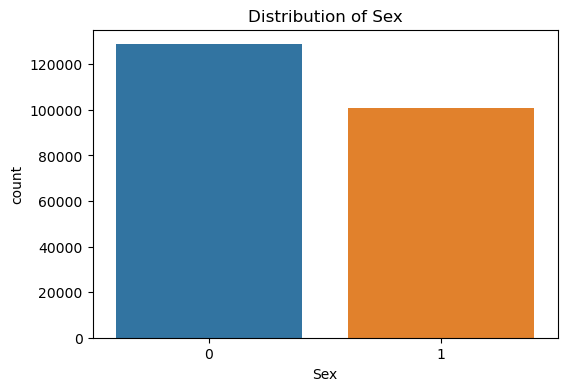

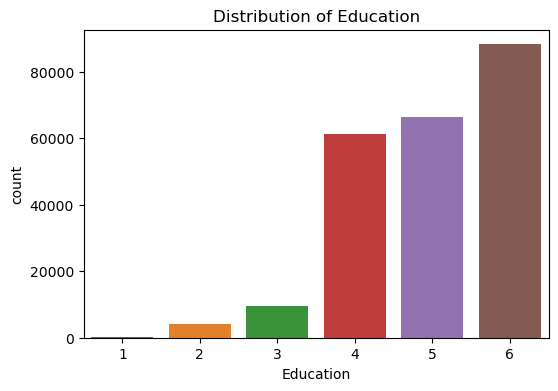

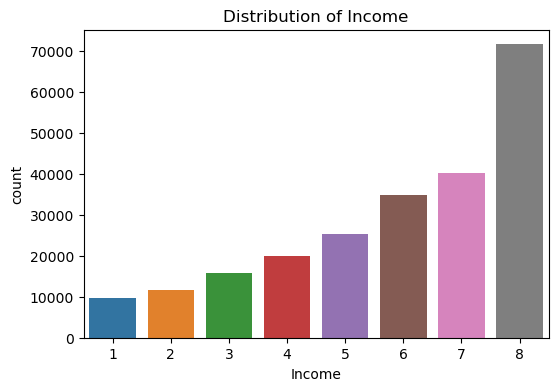

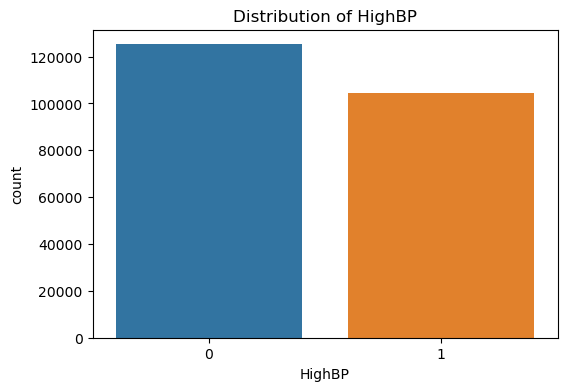

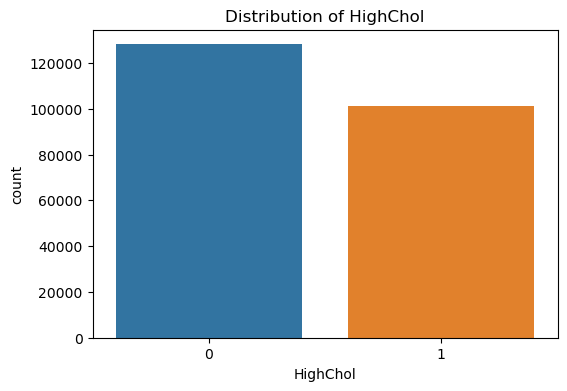

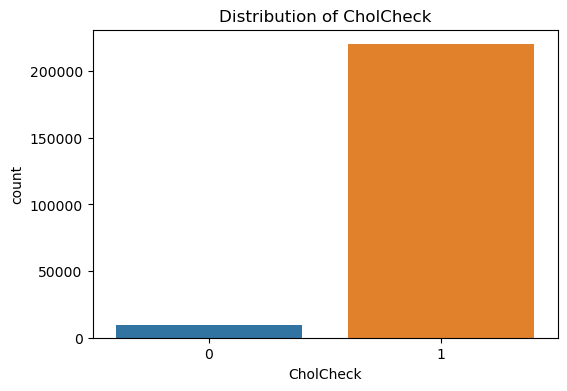

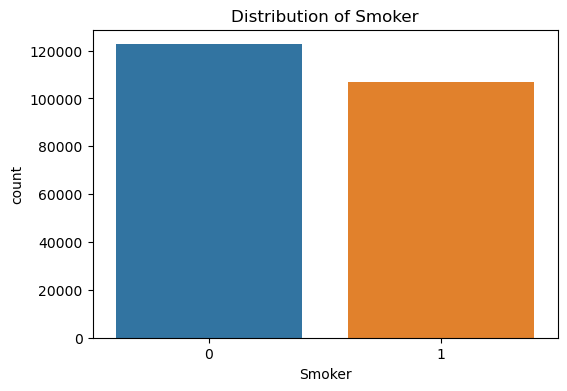

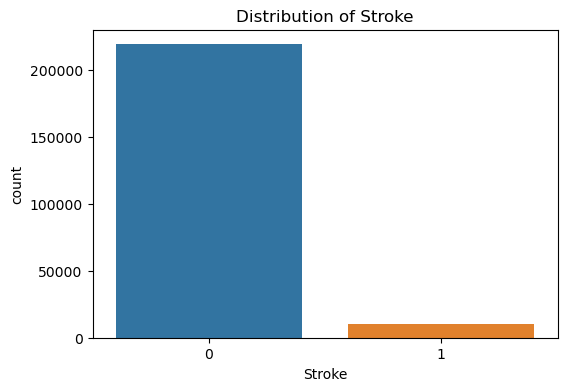

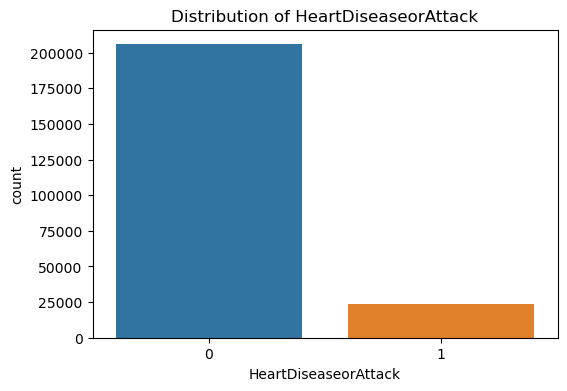

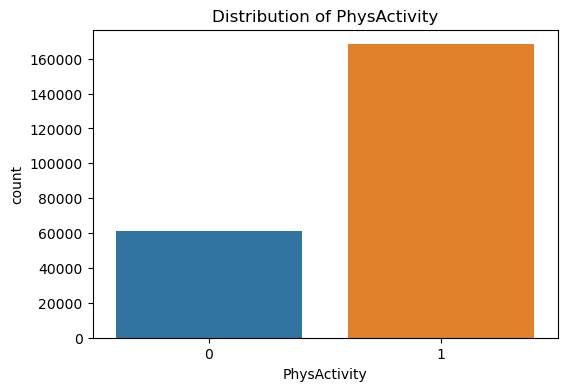

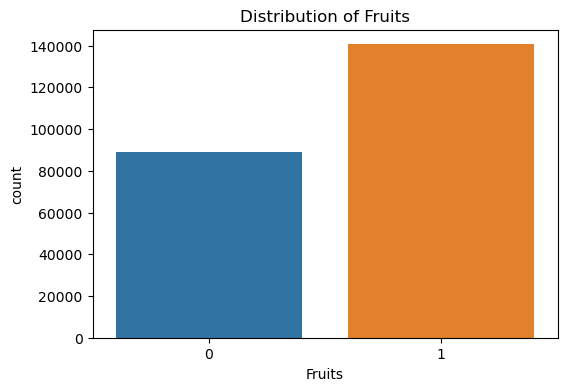

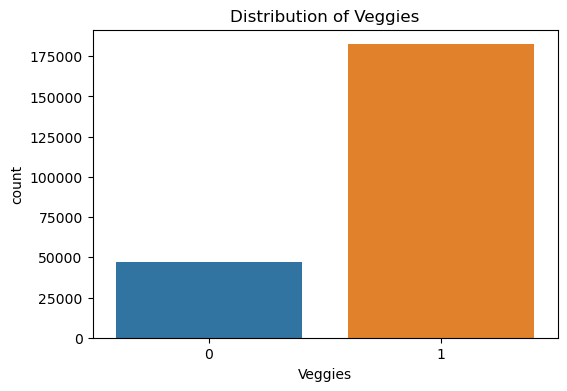

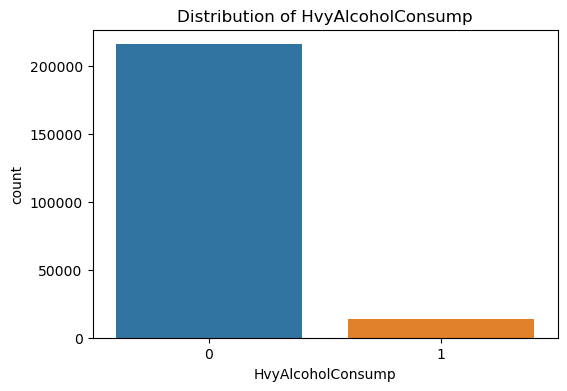

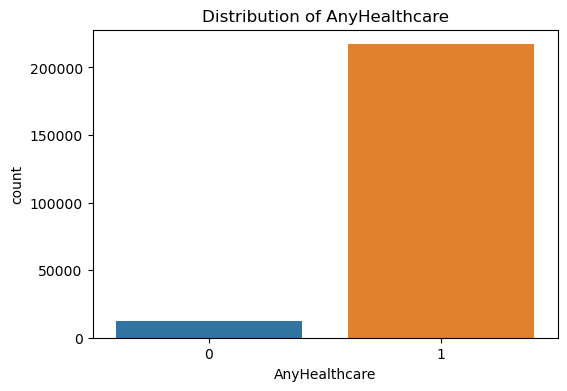

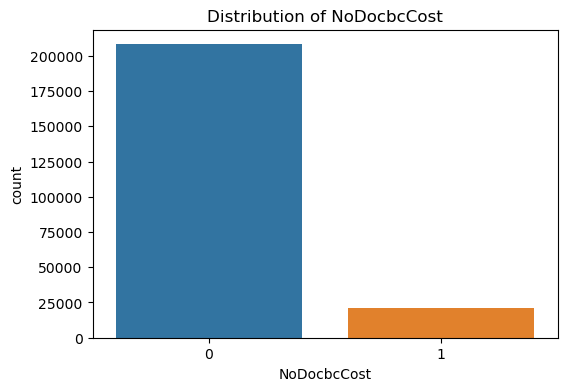

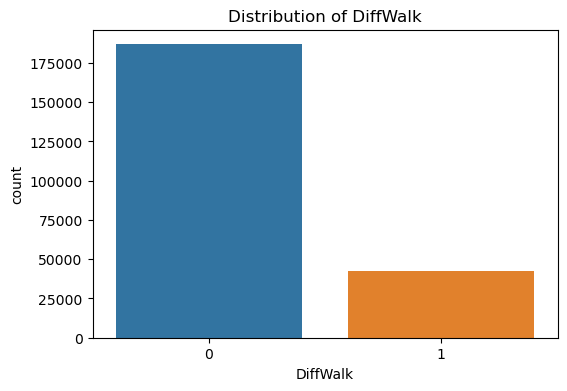

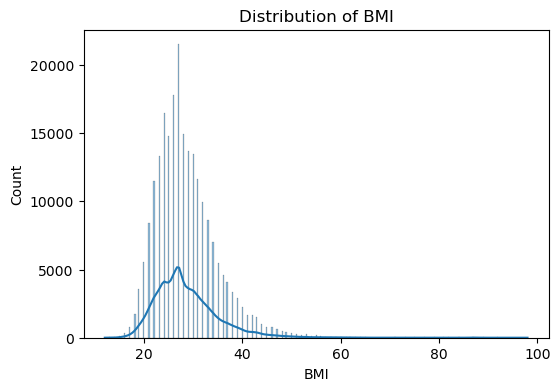

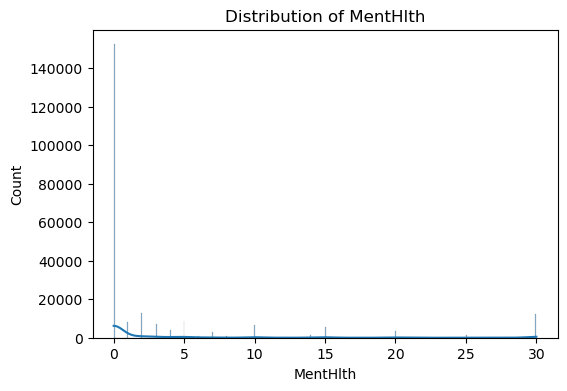

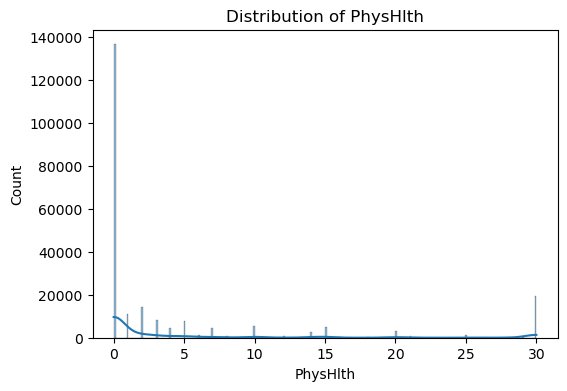

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for categorical columns
for col in categorical_columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.show()

# Histogram for numeric columns (like BMI, MentHlth, PhysHlth)
numeric_columns = ['BMI', 'MentHlth', 'PhysHlth']

for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


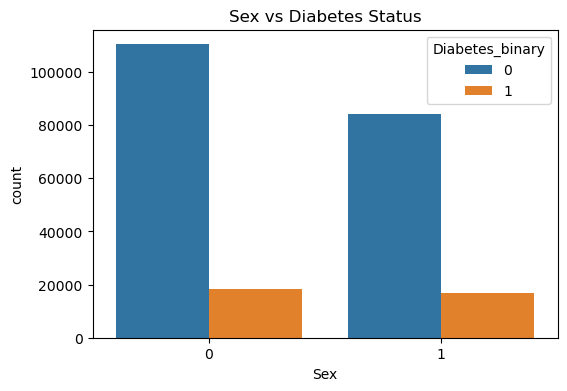

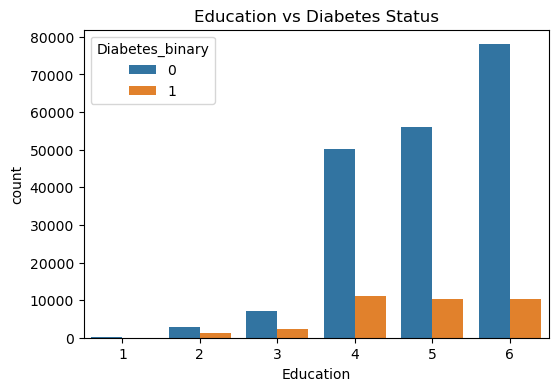

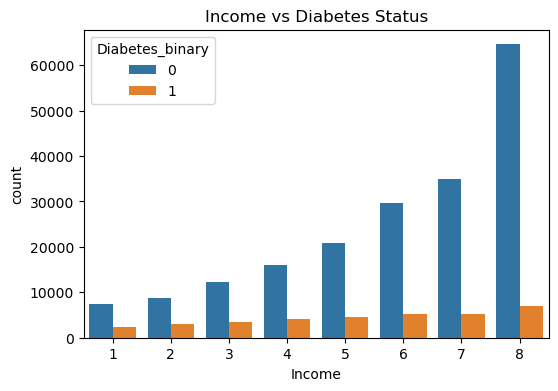

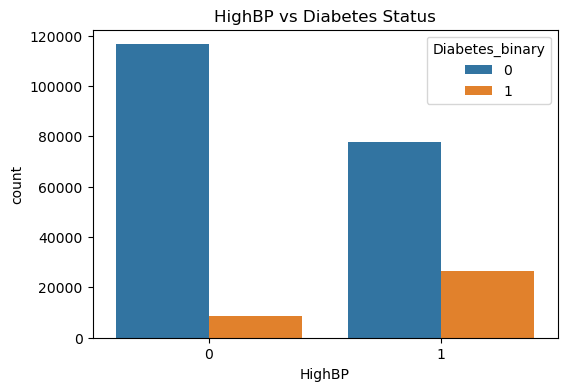

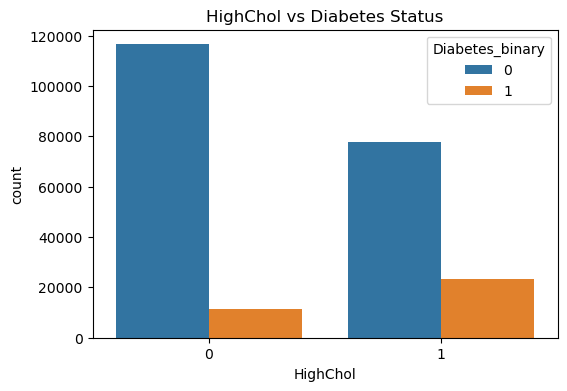

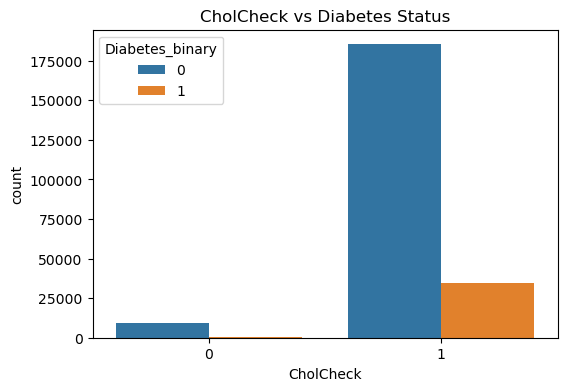

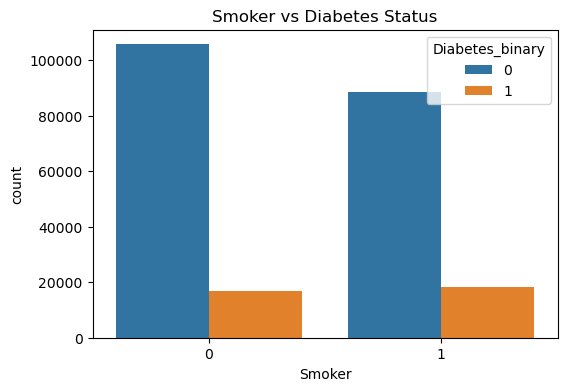

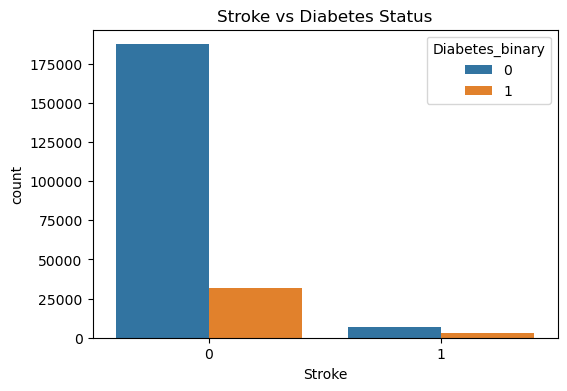

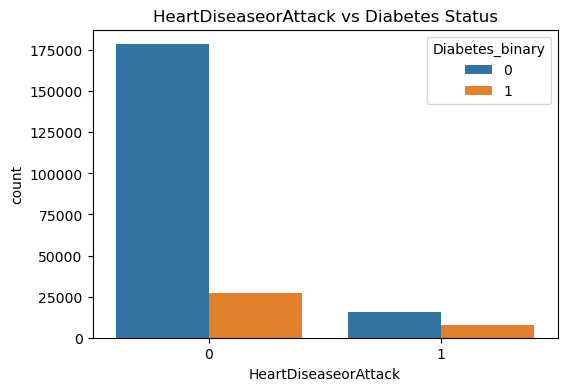

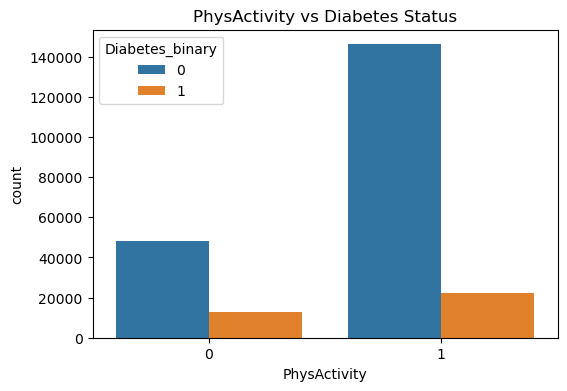

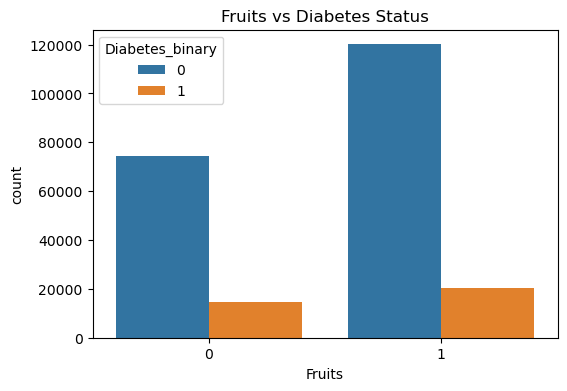

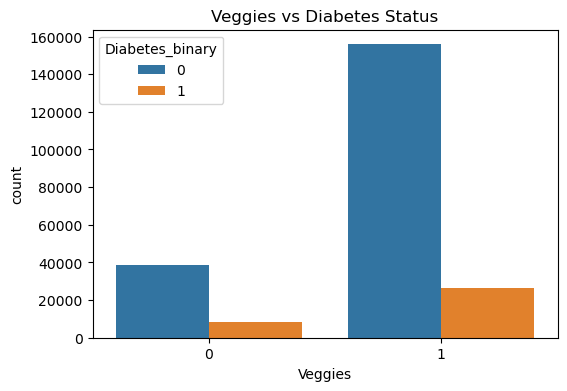

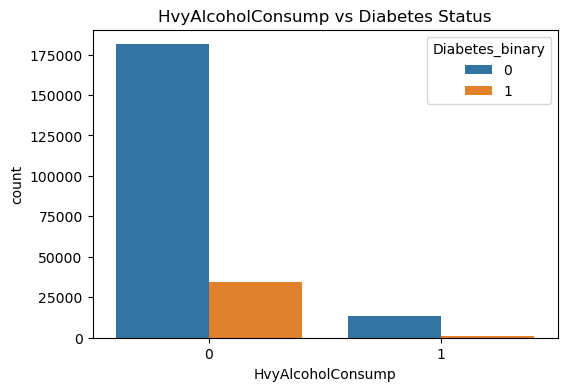

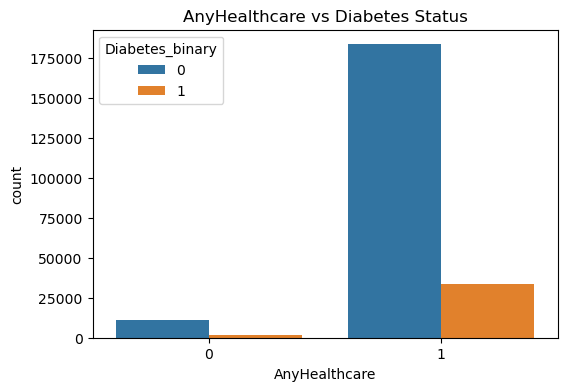

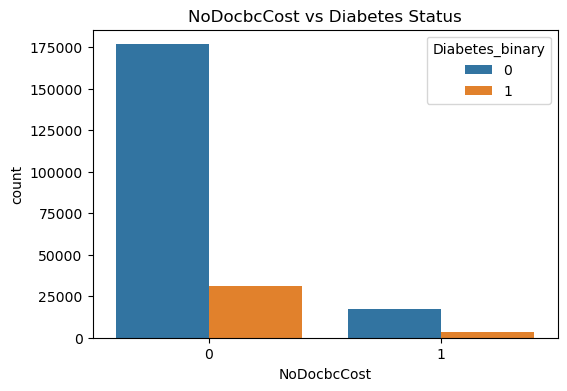

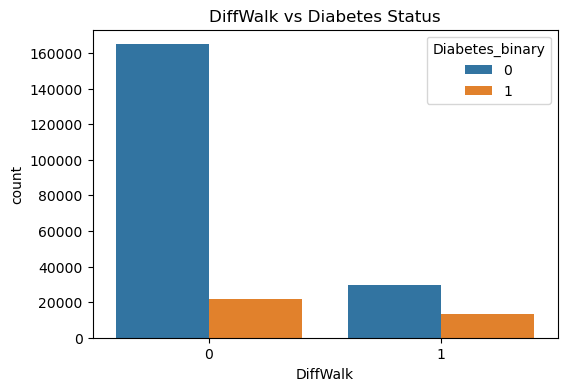

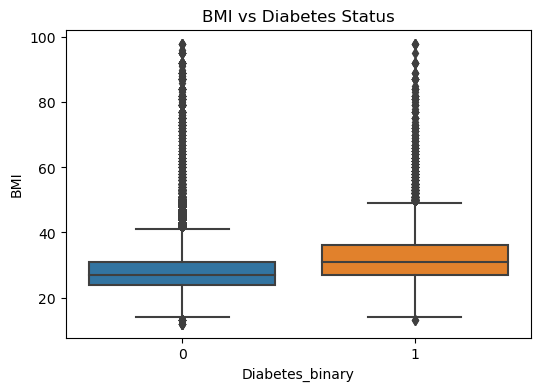

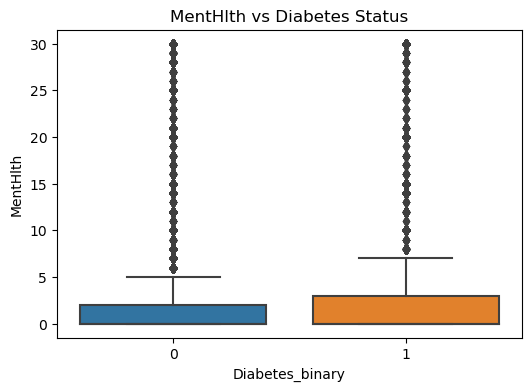

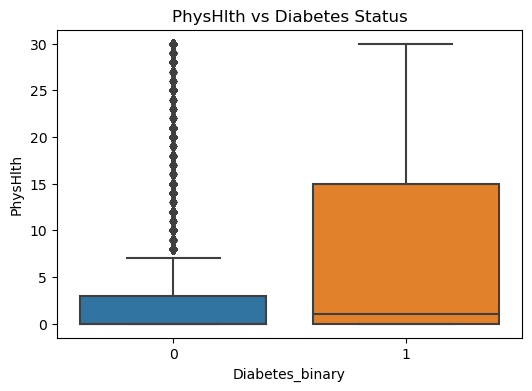

In [6]:
# Categorical features vs Diabetes_binary
for col in categorical_columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Diabetes_binary', data=df)
    plt.title(f"{col} vs Diabetes Status")
    plt.show()

# Boxplots for numerical columns (BMI, MentHlth, PhysHlth)
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Diabetes_binary', y=col, data=df)
    plt.title(f"{col} vs Diabetes Status")
    plt.show()


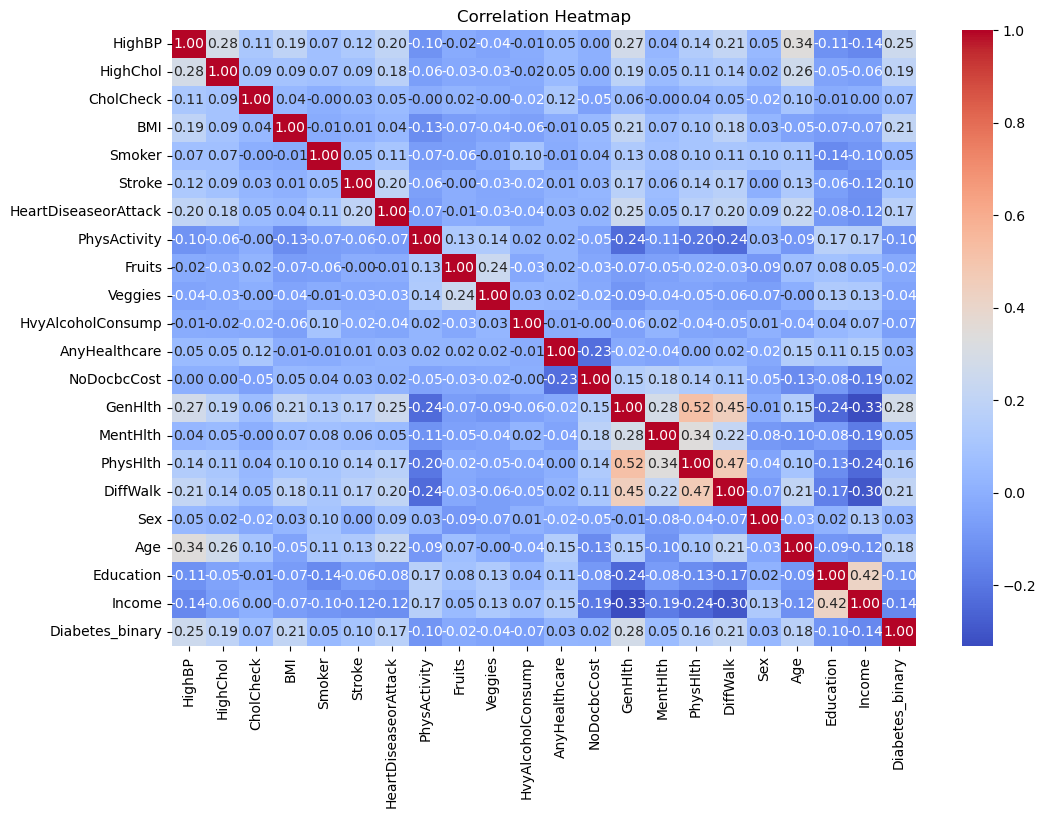

In [7]:
# Convert categories to numeric to create heatmap
df_encoded = df.copy()
df_encoded[categorical_columns] = df_encoded[categorical_columns].apply(lambda x: x.cat.codes)

# heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


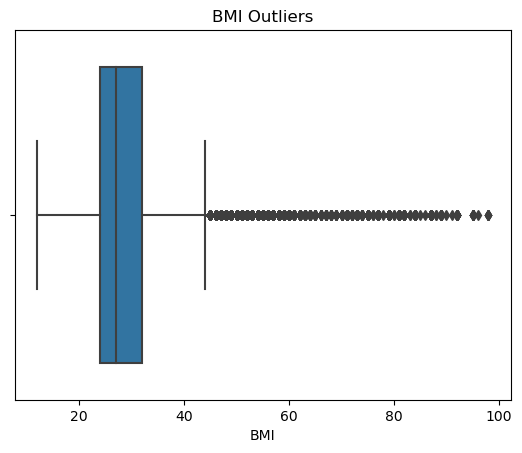

In [8]:
# Outlier Detection (Boxplot)
sns.boxplot(x=df['BMI'])
plt.title("BMI Outliers")
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


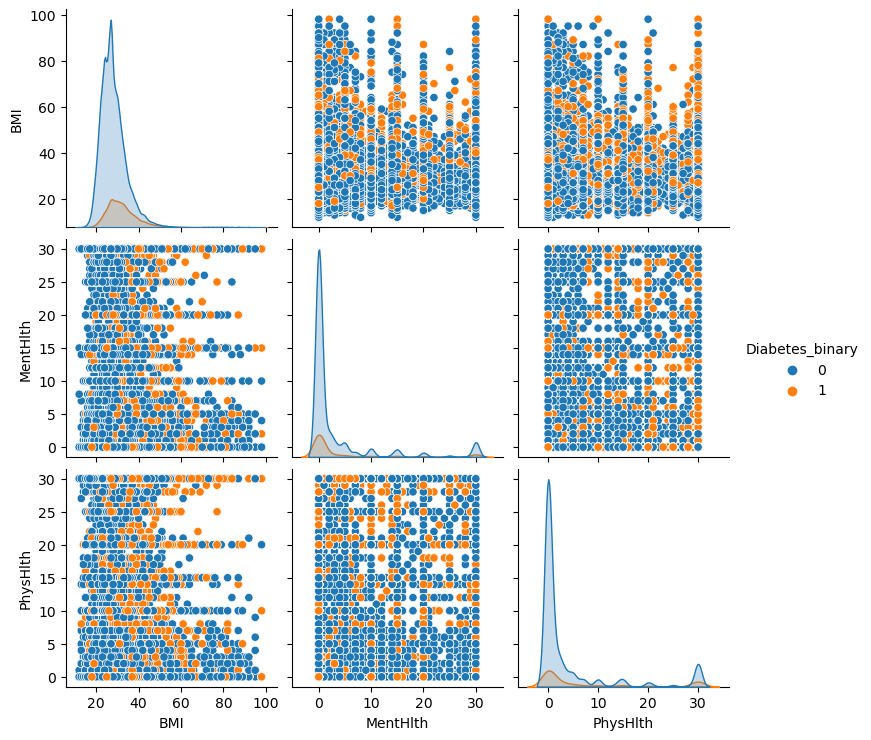

In [9]:
# Pairplot for Multivariate Relations
sns.pairplot(df, hue='Diabetes_binary', vars=['BMI', 'MentHlth', 'PhysHlth'])
plt.show()


In [24]:
print("Final Shape of Data:", df.shape)
print(df['Diabetes_binary'].value_counts())


Final Shape of Data: (253680, 22)
Diabetes_binary
0    218334
1     35346
Name: count, dtype: int64


Original Class Distribution:
 Diabetes_binary
0    218334
1     35346
Name: count, dtype: int64
Balanced Class Distribution:
 Diabetes_binary
0    35346
1    35346
Name: count, dtype: int64
Accuracy: 0.7465874531437867
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.73      0.74      7090
           1       0.74      0.76      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



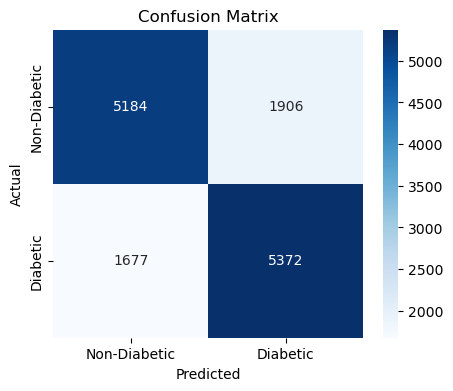

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler

# Load dataset
df = pd.read_csv("cdc_diabetes_health_indicators.csv")

# Define features and target
X = df.drop(columns=["Diabetes_binary"])
y = df["Diabetes_binary"]

# Class distribution before balancing
print("Original Class Distribution:\n", y.value_counts())

# Undersample Class 0 to 35,346
rus = RandomUnderSampler(sampling_strategy={0: 35346, 1: 35346}, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Class distribution after balancing
print("Balanced Class Distribution:\n", y_resampled.value_counts())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [30]:
# Comparison of actual v/s predicted values
# Model Accuracy 74.65%
comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(comparison_df.sample(10))


       Actual  Predicted
9790        1          1
12233       1          1
9088        1          1
10259       1          1
12626       0          0
5505        1          1
1783        1          1
13859       1          1
3537        0          0
13949       1          0
